# Pregnancy Risk Prediction

# Introduction

Pregnancy is a profound and transformative experience that marks the beginning of a new life. It is the period during which a woman carries a developing fetus within her uterus, typically lasting about 40 weeks from the first day of the last menstrual period (LMP) to the birth of the baby. This journey is divided into three trimesters, each characterized by distinct stages of fetal development and maternal changes.
    - First trimester(week 1-12)
    - Second trimester (weeks 13-27)
    - Third trimester (weeks 28-40)

Pregnacy comes with various risks and challenges, both for the expectant mother and her unborn child. Predicting and managing these risks is crucial to ensuring a safe and healthy pregnancy. This is where the field of data science plays a pivotal role.

This project aims to provide a user-friendly interface and API for predicting the risk level of pregnant women using machine learning models. The project utilizes three different models: Decision Tree, Random Forest, and XGBoost. These models are trained to predict the risk level based on various input features such as age, blood pressure, blood sugar, body temperature, and heart rate. 

# Objective

The primary objective of this project is to practice what has been taught in class by using different machine learning models predicting pregnancy risks.
The specific objective
- Utilize pipelines to simplify and automate the machine learning workflow, connecting various steps to reduce time and effort, enhance data training efficiency, and prevent mistakes.
- Provide an intuitive web interface where users can input their data and receive risk predictions.
- Allow users to choose between different machine learning models for prediction.
- Offer an API for developers to integrate the risk prediction functionality into their applications.
- Ensure that the predictions are accurate and reliable by using well-trained machine learning models.

# About the Data Set

The data set was taken from https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data. It is a data set collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [2]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


The data set contains the followimng features columns:
Age: Age in years when a woman is pregnant.
SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
HeartRate: A normal resting heart rate in beats per minute.
Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

In [3]:
data.shape

(1014, 7)

# Descriptive Analysis of the Data

In [4]:
# Identifying the number of records, features and the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
# Analyzing missing values
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
data['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [7]:
# Descriptive analysis 
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


from the descriptive analysis it can be observed that
- the data has 1014 entries and 7 features
- it has an object column (risk level) which needs to be converted to numerical
- Risk Level will be the target and the rest of the features will be the predictors
- There are no null values
- There are dublicated rows
- There is a minimum heart rate of 7, which doesn't make sense

# Data Pre processing

In [8]:
# create copy of the dataset
df = data.copy()

In [9]:
df.shape

(1014, 7)

In [10]:
# The heart rate with 7 would be replaced with the mode of the column
df.HeartRate.mode()

0    70
Name: HeartRate, dtype: int64

In [11]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70

In [12]:
# Feature encoding for categorical variable
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [13]:
risklevel = {"low risk" : 0,
            "mid risk" : 1,
            "high risk" : 2}

# Apply Using Map
df["RiskLevel"] = df["RiskLevel"].map(risklevel).astype(float)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2.0
1,35,140,90,13.0,98.0,70,2.0
2,29,90,70,8.0,100.0,80,2.0
3,30,140,85,7.0,98.0,70,2.0
4,35,120,60,6.1,98.0,76,0.0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2.0
1010,55,120,90,18.0,98.0,60,2.0
1011,35,85,60,19.0,98.0,86,2.0
1012,43,120,90,18.0,98.0,70,2.0


# Data visualization

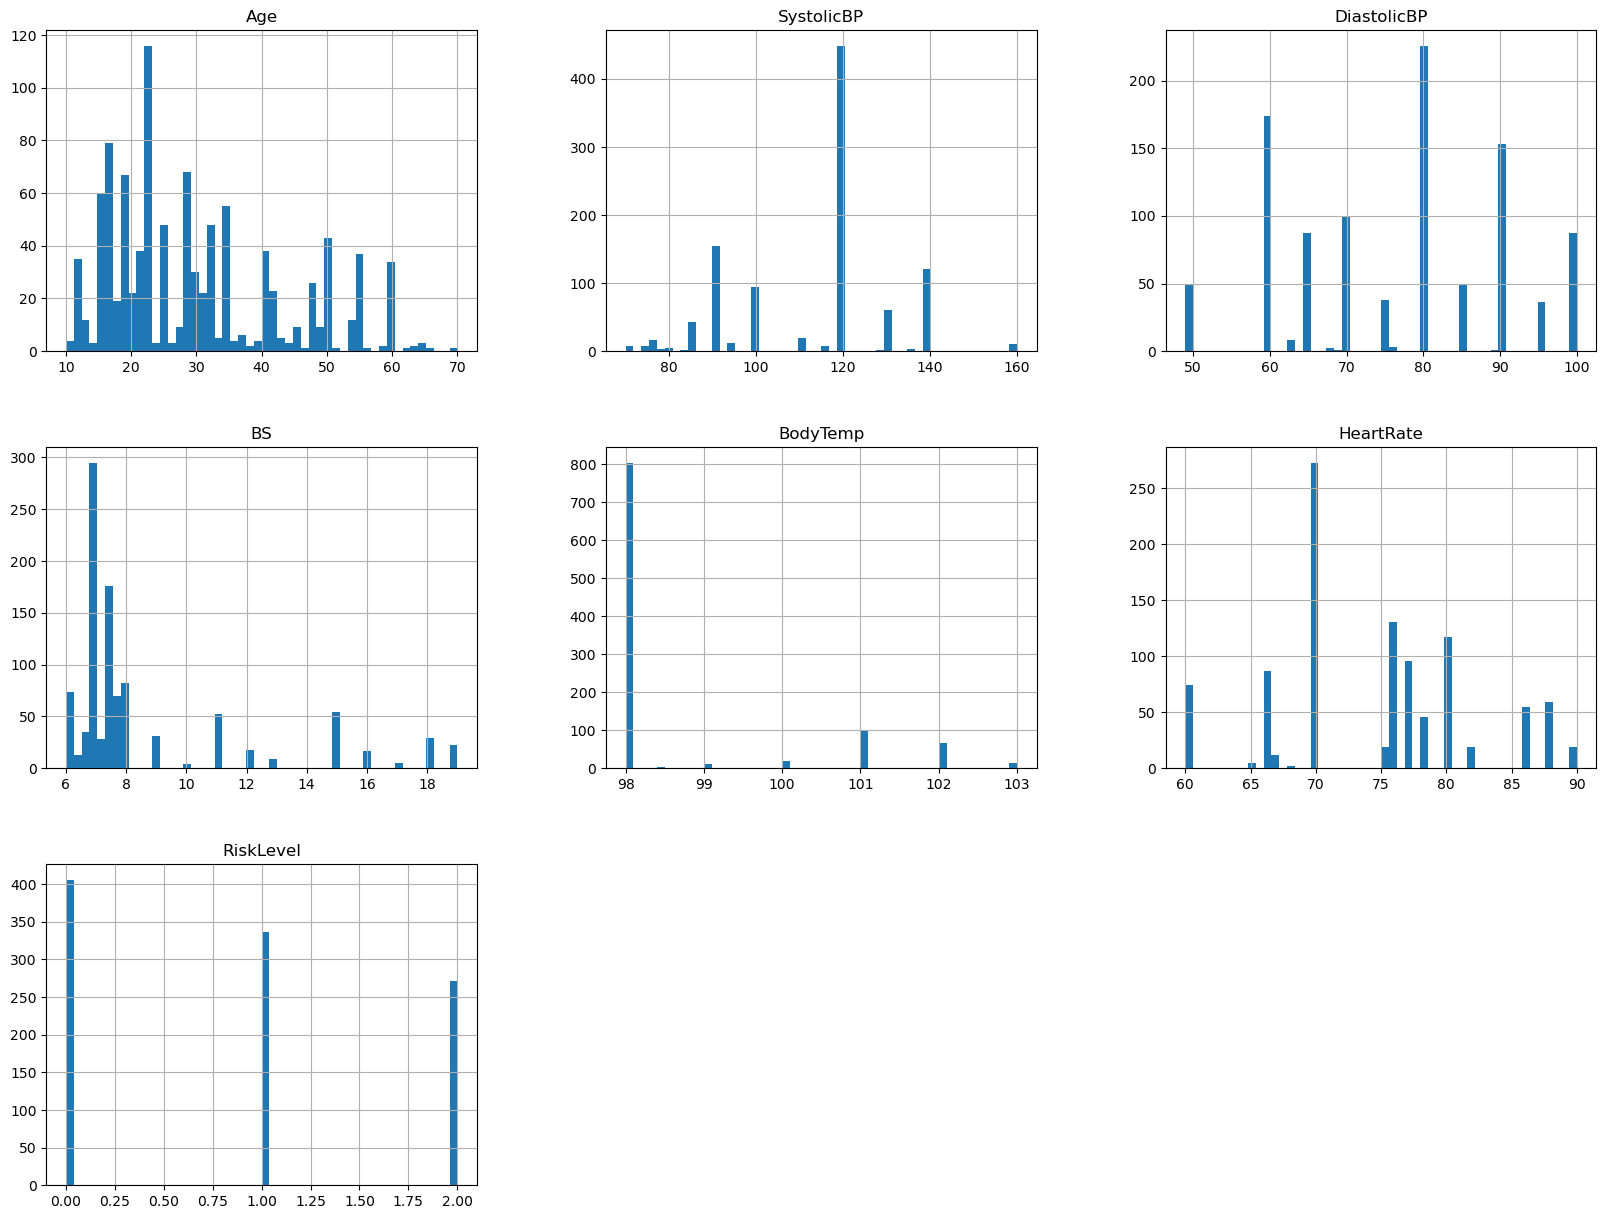

In [14]:
# Histogram of all features
df.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: xlabel='RiskLevel', ylabel='count'>

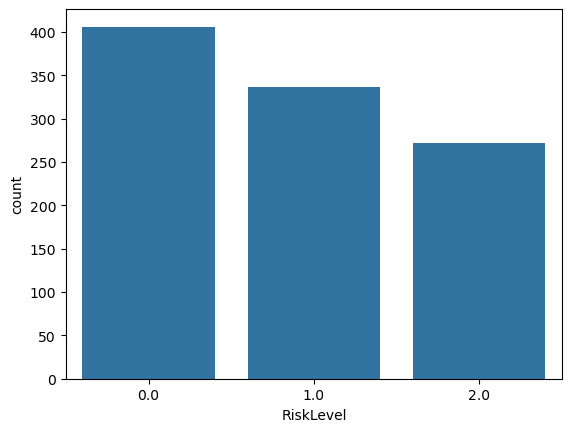

In [15]:
## Check the target variable is balanced or not
sns.countplot(data=df, x="RiskLevel")

In [16]:
df['RiskLevel'].value_counts()

RiskLevel
0.0    406
1.0    336
2.0    272
Name: count, dtype: int64

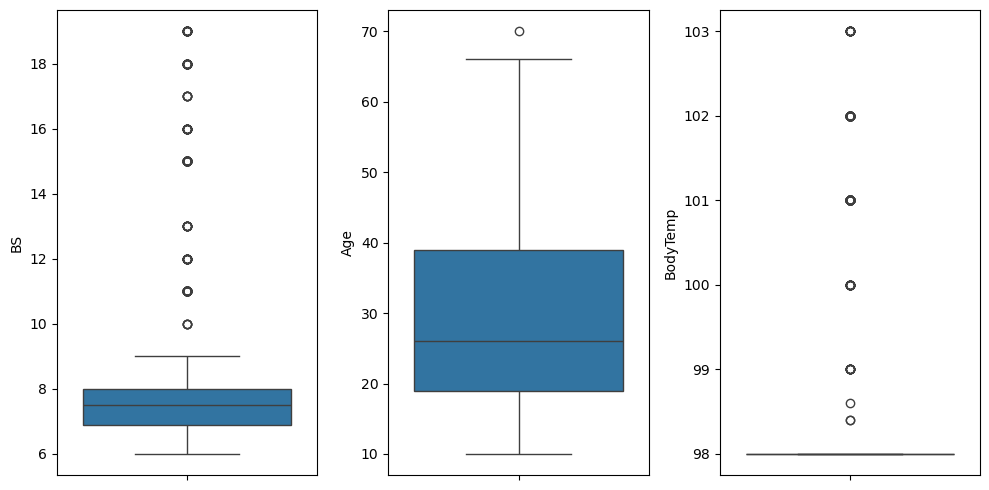

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'BS', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Age', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'BodyTemp', data = df)

plt.tight_layout()
plt.show();

Some data points are outside the boxplot area. The data maybe actual data points. 

# Train Test/ Split

In [18]:
# Separate features and target
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [19]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42, stratify=y)
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (811, 6)
Test: (203, 6)


# Machine Learning Models Pipeline

In [20]:
# Features to scale
features_to_scale = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]

# ColumnTransformer for scaling
transformer = ColumnTransformer(
    transformers=[("scaler", StandardScaler(), features_to_scale)],
    remainder="passthrough"
)

rf_model = RandomForestClassifier(random_state=42)
    
pipe_rf = Pipeline(steps=[
    ("transformer", transformer),
     ("rf_model", rf_model)
])
pipe_rf

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'SystolicBP',
                                                   'DiastolicBP', 'BS',
                                                   'BodyTemp',
                                                   'HeartRate'])])),
                ('rf_model', RandomForestClassifier(random_state=42))])

In [21]:
dt_model = DecisionTreeClassifier(random_state=42)

# Decision Tree pipeline
pipe_dt = Pipeline(steps=[
    ("transformer", transformer),
    ("dt_model", dt_model)
])
pipe_dt

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'SystolicBP',
                                                   'DiastolicBP', 'BS',
                                                   'BodyTemp',
                                                   'HeartRate'])])),
                ('dt_model', DecisionTreeClassifier(random_state=42))])

In [22]:
# XGBoost parameters
xgb_model = XGBClassifier(random_state=42, eval_metric="mlogloss")

pipe_xgb = Pipeline(steps=[
    ("transformer", transformer),
    ("xgb_model", xgb_model)
])

pipe_xgb

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'SystolicBP',
                                                   'DiastolicBP', 'BS',
                                                   'BodyTemp',
                                                   'HeartRate'])])),
                ('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_roun...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [23]:
# Train Random Forest
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'SystolicBP',
                                                   'DiastolicBP', 'BS',
                                                   'BodyTemp',
                                                   'HeartRate'])])),
                ('rf_model', RandomForestClassifier(random_state=42))])

In [24]:
# Train Decision Tree
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'SystolicBP',
                                                   'DiastolicBP', 'BS',
                                                   'BodyTemp',
                                                   'HeartRate'])])),
                ('dt_model', DecisionTreeClassifier(random_state=42))])

In [25]:
# Train XGBoost
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'SystolicBP',
                                                   'DiastolicBP', 'BS',
                                                   'BodyTemp',
                                                   'HeartRate'])])),
                ('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_roun...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [28]:
# Evaluate Random Forest Model
y_pred_rf = pipe_rf.predict(X_test)
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Evaluation:
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84        81
         1.0       0.79      0.81      0.80        67
         2.0       0.90      0.96      0.93        55

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.86       203
weighted avg       0.85      0.85      0.85       203



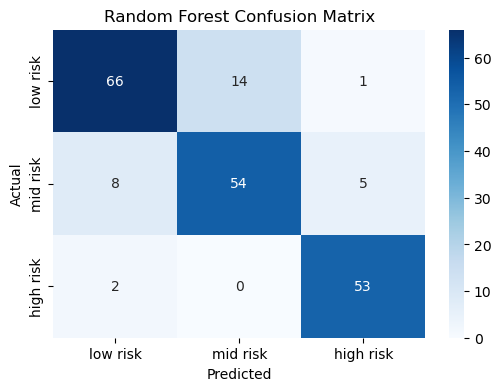

In [29]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=risklevel.keys(), yticklabels=risklevel.keys())
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
# Evaluate Decision Tree
# Evaluate Decision Tree Model
y_pred_dt = pipe_dt.predict(X_test)
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Evaluation:
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82        81
         1.0       0.77      0.79      0.78        67
         2.0       0.90      0.96      0.93        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203



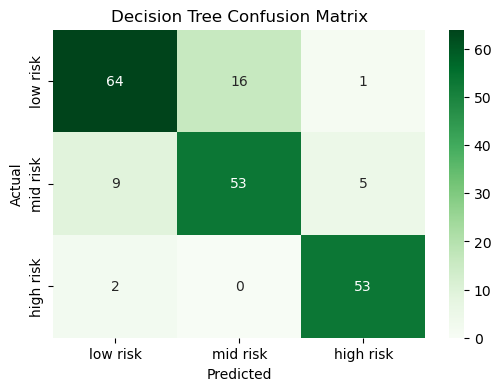

In [31]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=risklevel.keys(), yticklabels=risklevel.keys())
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
# Evaluate XGBoost Model
y_pred_xgb = pipe_xgb.predict(X_test)
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Random Forest Evaluation:
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84        81
         1.0       0.82      0.79      0.80        67
         2.0       0.88      0.96      0.92        55

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.86       203
weighted avg       0.85      0.85      0.85       203



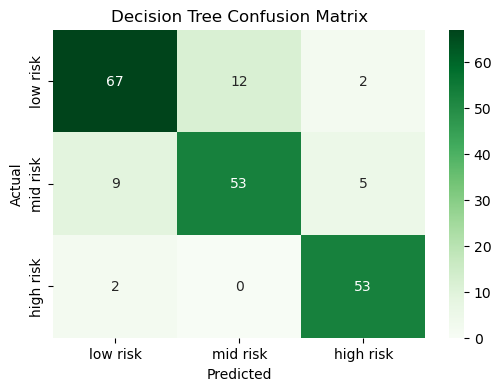

In [33]:
# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=risklevel.keys(), yticklabels=risklevel.keys())
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Exporting the models to pickle

In [36]:
pickle.dump(pipe_rf, open("random_forest_model.pkl", "wb"))
pickle.dump(pipe_dt, open("decision_tree_model.pkl", "wb"))
pickle.dump(pipe_xgb, open("xgboost_model.pkl.pkl", "wb"))

# Conclusion

The Pregnancy Risk Prediction project successfully demonstrates the use of machine learning models to predict pregnancy risks. The Streamlit application provides an easy-to-use interface for end-users, while the FastAPI application offers a robust API for developers. By leveraging these tools and integrating a seamless prediction pipeline, the project aims to improve the accessibility and accuracy of pregnancy risk predictions, ultimately contributing to better healthcare outcomes.